In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [2]:
print(tf.__version__)
oko = 'dupa'

2.5.0-dev20201227


In [3]:
pd.set_option('display.max_columns', None)

In [42]:
ra_dataset = pd.read_csv('WinOrLoose/E03_R02_S01.txt', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')


In [43]:
dataset = ra_dataset.iloc[1:100,:12]

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 1 to 99
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Czas                 99 non-null     float64
 1   A: BVP1              99 non-null     float64
 2   B: BVP2              99 non-null     float64
 3   C: EMG1              99 non-null     float64
 4   D: EMG2              99 non-null     float64
 5   E: Skin Cond         99 non-null     float64
 6   F: Temp1             99 non-null     float64
 7   G: Abd Resp          99 non-null     float64
 8   H: Thor Resp         99 non-null     float64
 9   I: Temp2             99 non-null     float64
 10  SC-Pro/Flex - 1J     99 non-null     float64
 11  Temp2 as % of value  99 non-null     float64
dtypes: float64(12)
memory usage: 9.4 KB


In [45]:
dataset

,Czas,A: BVP1,B: BVP2,C: EMG1,D: EMG2,E: Skin Cond,F: Temp1,G: Abd Resp,H: Thor Resp,I: Temp2,SC-Pro/Flex - 1J,Temp2 as % of value
1,0.00390625,0.005,0.003,13.038,2.783,5.311,32.192,11.800,9.778,32.815,1.749,33.485
2,0.00781250,0.069,0.052,14.488,2.783,5.311,32.192,11.800,9.779,32.815,1.749,33.485
3,0.01171875,0.318,0.238,14.695,2.732,5.311,32.191,11.800,9.779,32.815,1.749,33.485
4,0.01562500,0.893,0.672,14.022,2.680,5.311,32.191,11.801,9.780,32.815,1.749,33.485
5,0.01953125,1.915,1.451,16.456,2.680,5.311,32.191,11.801,9.780,32.815,1.749,33.485
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.37109375,37.792,35.919,13.556,2.835,5.314,32.189,11.865,9.597,32.819,1.753,33.488
96,0.37500000,37.708,35.932,14.643,2.835,5.313,32.189,11.868,9.594,32.819,1.754,33.488
97,0.37890625,37.624,35.947,15.938,2.783,5.313,32.189,11.870,9.592,32.819,1.754,33.488
98,0.38281250,37.541,35.962,17.440,2.783,5.313,32.189,11.873,9.590,32.819,1.754,33.488


In [46]:

def convertObjectToFloat():
    for columnName in dataset.columns.values:
            dataset[columnName] = pd.to_numeric(dataset[columnName], errors='coerce')
        
convertObjectToFloat()

<AxesSubplot:xlabel='Czas', ylabel='A: BVP1'>

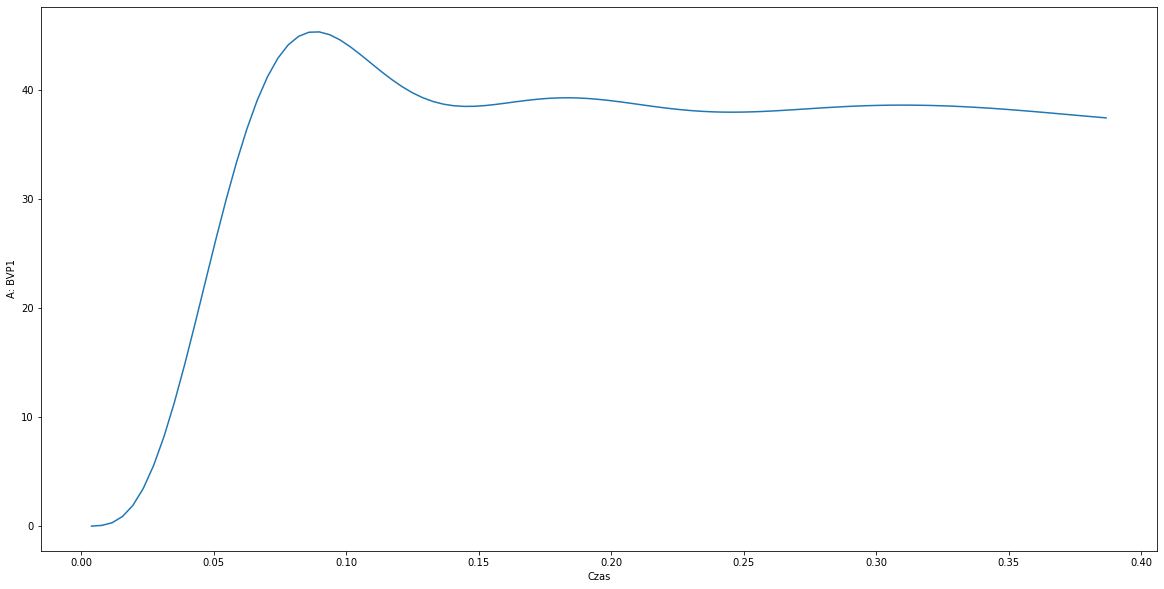

In [48]:
plt.figure(figsize=(20,10))
sns.lineplot(data=dataset, x="Czas", y="A: BVP1")
